In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [15]:
df1=pd.read_csv("2019happinessindex.csv")
print(df1)

     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1  

In [17]:
data=df1

In [19]:
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [21]:
data.head()
data.size,data.shape
data.columns = ['Overall_rank','Country','Score','GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']
data.head()

,Overall_rank,Country,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

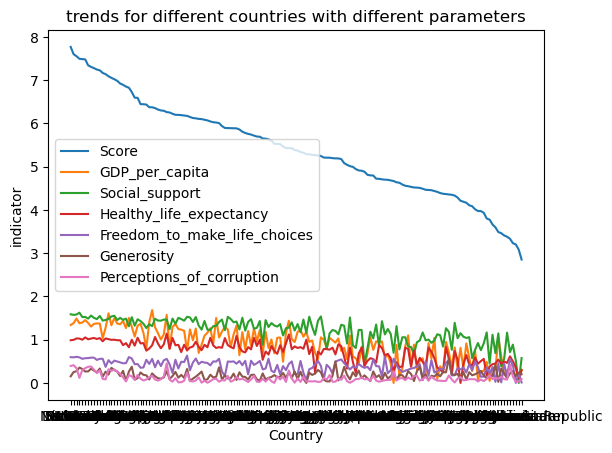

In [29]:
for indicator in ['Score','GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']:
     plt.plot(data['Country'],data[indicator],label=indicator)
plt.xlabel('Country')
plt.ylabel('indicator')
plt.title('trends for different countries with different parameters')
plt.legend()
plt.show()
    

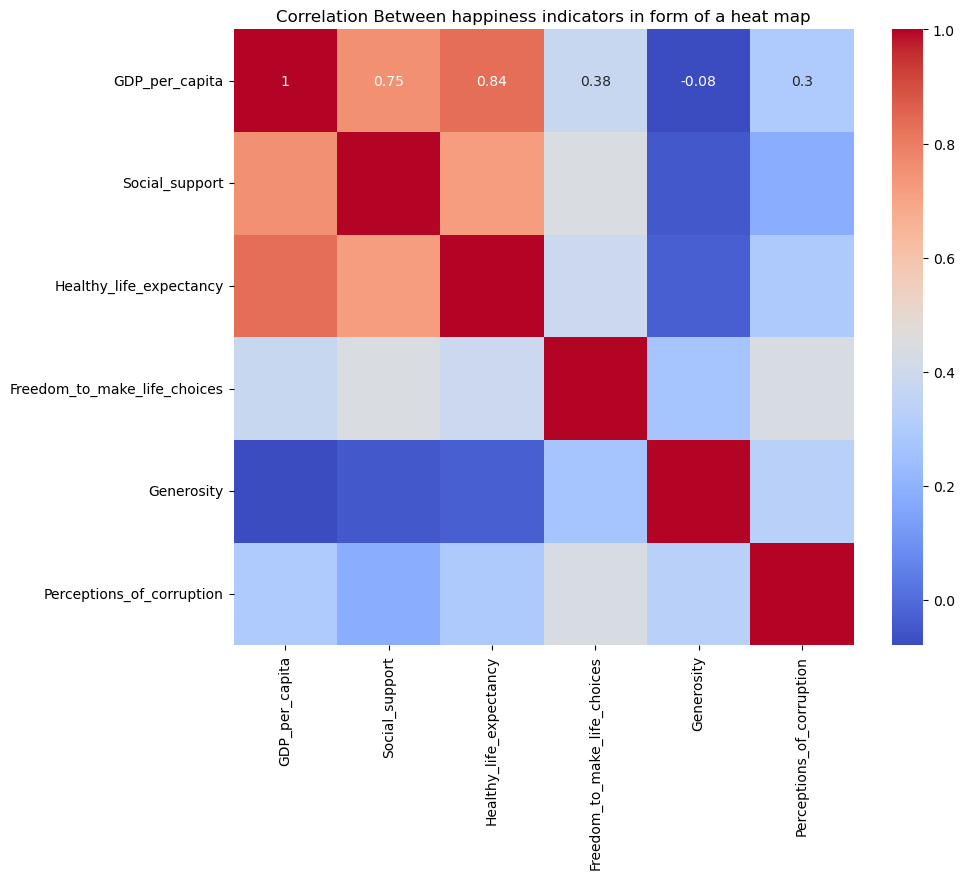

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.drop(['Country','Score','Overall_rank'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between happiness indicators in form of a heat map')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
features = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
            'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']
target = 'Score'

X = data[features]
y = data[target]
model = LinearRegression()
model.fit(X, y)
def predict_happiness_score(gdp_per_capita, social_support, healthy_life_expectancy, 
                            freedom_to_make_life_choices, generosity, perceptions_of_corruption):
    # Create a DataFrame for the input parameters
    input_data = pd.DataFrame({
        'GDP_per_capita': [gdp_per_capita],
        'Social_support': [social_support],
        'Healthy_life_expectancy': [healthy_life_expectancy],
        'Freedom_to_make_life_choices': [freedom_to_make_life_choices],
        'Generosity': [generosity],
        'Perceptions_of_corruption': [perceptions_of_corruption]
    })
    
    # Predict the happiness score
    predicted_score = model.predict(input_data)
    return predicted_score[0]

# Example usage with user input
gdp_per_capita = float(input("Enter GDP per capita: "))
social_support = float(input("Enter Social support: "))
healthy_life_expectancy = float(input("Enter Healthy life expectancy: "))
freedom_to_make_life_choices = float(input("Enter Freedom to make life choices: "))
generosity = float(input("Enter Generosity: "))
perceptions_of_corruption = float(input("Enter Perceptions of corruption: "))

predicted_score = predict_happiness_score(gdp_per_capita, social_support, healthy_life_expectancy, 
                                          freedom_to_make_life_choices, generosity, perceptions_of_corruption)

print(f'Predicted Happiness Score: {predicted_score}')

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
threshold = 7.5
data['Happiness_Class'] = (data['Score'] >= threshold).astype(int)

# Select features and target variable
features = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
            'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']
target = 'Happiness_Class'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Function to predict happiness class based on user input
def predict_happiness_class(gdp_per_capita, social_support, healthy_life_expectancy, 
                            freedom_to_make_life_choices, generosity, perceptions_of_corruption):
    # Create a DataFrame for the input parameters
    input_data = pd.DataFrame({
        'GDP_per_capita': [gdp_per_capita],
        'Social_support': [social_support],
        'Healthy_life_expectancy': [healthy_life_expectancy],
        'Freedom_to_make_life_choices': [freedom_to_make_life_choices],
        'Generosity': [generosity],
        'Perceptions_of_corruption': [perceptions_of_corruption]
    })
    
    # Predict the happiness class
    predicted_class = model.predict(input_data)
    return predicted_class[0]

# Example usage with user input
gdp_per_capita = float(input("Enter GDP per capita: "))
social_support = float(input("Enter Social support: "))
healthy_life_expectancy = float(input("Enter Healthy life expectancy: "))
freedom_to_make_life_choices = float(input("Enter Freedom to make life choices: "))
generosity = float(input("Enter Generosity: "))
perceptions_of_corruption = float(input("Enter Perceptions of corruption: "))

predicted_class = predict_happiness_class(gdp_per_capita, social_support, healthy_life_expectancy, 
                                          freedom_to_make_life_choices, generosity, perceptions_of_corruption)

if predicted_class == 1:
    print('The country is classified as Happy.')
else:
    print('The country is classified as Not Happy.')




